## 4-1 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비하기

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)
# 위에는 stratify는 안했는데 분류에서는 특정 물고기 집단이 몰려서 배정되지 않게 층화를 해주는게 좋다.

In [ ]:
print(train_input.shape)
print(test_input.shape)

(119, 5)
(40, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
proba = kn.predict_proba(test_scaled[:5])

import numpy as np
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # test_scaled[3:4]를 넣은 이유는 2차원 list를 넣기 위해. [test_scaled[3]]을 넣어도 됨
print(indexes)
print(train_target[indexes]) # Roach 1개, Perch 2개라서 Perch는 0.6667, Poach는 0.3333

[[104 115 106]]
[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

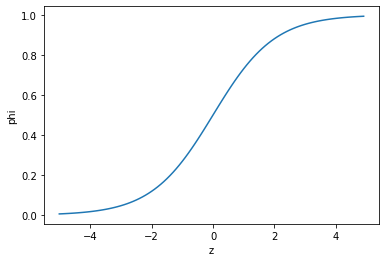

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
def my_logistic(z):
  phi = 1/(1 + np.exp(-z))
  return phi
# 로지스틱 함수를 직접 정의 (expit함수와 같음)

### 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))
print(target_bream_smelt[:5])

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.classes_) # 0번째 인덱스 Bream, 1번째 인덱스 Smelt
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.coef_, lr.intercept_) # 계수의 좌측부터 Weight	Length	Diagonal	Height	Width

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) # 로지스틱 함수의 z값 출력

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions)) # 로지스틱 함수의 phi값

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
print(my_logistic(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20, max_iter = 1000) # C가 높을수록 규제가 약해짐 (모델이 복잡해짐)

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
import numpy as np

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_) # 7종류의 물고기

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape) # 로지스틱 함수가 7개 만들어짐

(7, 5) (7,)


In [ ]:
decisions = lr.decision_function(test_scaled[:5])

import numpy as np
print(np.round(decisions, decimals = 2)) # z값

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decisions, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
def my_softmax(z):


## 4-2 확률적 경사 하강법

## SGDClassifier

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
# SGDClassifier는 하나씩 꺼내는 확률적 경사하강법만 지원하고 배치나 미니배치는 지원하지 않음
# loss = 'log'는 로지스틱 손실함수를 적용 (로지스틱 회귀모델을 훈련)
# 경사하강법은 머신러닝 모델이 아니라 머신러닝 모델을 훈련(최적화)하는 방법임 (따라서 어떤 모델을 훈련할건지 정해줘야 함)
# 점진적인 학습을 위해 max_iter(에포크)값은 10정도로 작게 줌
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [ ]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# test세트의 점수가 조금 더 높음 (더 훈련을 해야함)

0.773109243697479
0.775


In [ ]:
sc.partial_fit(train_scaled, train_target) # 점진적으로 모델을 학습
# 그냥 fit 메서드를 호출하면 이전에 학습했던 가중치와 절편을 다 버리고 새로 학습
# partial_fit은 기존에 학습했던 가중치와 절편을 유지하면서 학습
# 앞에서 SGDClassifier의 max_iter를 10으로 잡았기 때문에 총 20번 반복한 셈

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [ ]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 훈련이 더 잘되긴 했지만 여전히 과소적합인 모습이다.
# epoch(max_iter)를 늘리면 과대적합으로 갈 수 있다.
# 릿지와 라쏘에서의 알파값은 작을수록 과대적합, 클수록 과소적합되는 경향
# SGD에서 에포크는 낮을수록 과소적합, 클수록 과대적합되는 경향

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [ ]:
train_score = []
test_score = []

In [ ]:
import numpy as np

classes = np.unique(train_target) # 물고기의 종류를 classes라는 객체에 저장

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', random_state = 42)

In [ ]:
# fit 메서드 없이 partial_fit 메서드를 곧바로 사용하려면 전체 샘플의 가능한 class 목록을 전달해야함
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

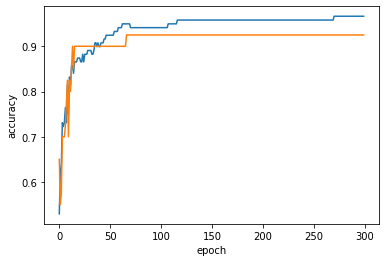

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(300), train_score)
plt.plot(np.arange(300), test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
# tol값의 디폴트는 0.001이다. 반복학습을 진행하다보면 손실함수가 줄어드는데
# 손실함수의 값이 tol값보다 작게 되면 반복학습을 중단하라는 메서드임.
# tol = None으로 두면 설정한 max_iter만큼의 학습을 끝까지 진행
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
